In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import os
from pathlib import Path

from tqdm.autonotebook import tqdm





In [68]:
# The goal of this notebook is to pick a handful of households from
# the data set while ending up with as minimum Nan as possible!


In [69]:
# We are using already clean data.!
source_data = Path("./london_dataset/")
block_data_path = source_data/'halfhourly_dataset'/'halfhourly_dataset'/'two_block'


In [70]:
block_1 = pd.read_csv(block_data_path/"block_1.csv", parse_dates=False)
block_1['tstp'] = pd.to_datetime(block_1['tstp'], yearfirst=True)
block_1.head()

# this is a sample from data!

,LCLid,tstp,energy(kWh/hh)
0,MAC000323,2012-03-06 14:00:00,0.488
1,MAC000323,2012-03-06 14:30:00,0.449
2,MAC000323,2012-03-06 15:00:00,0.424
3,MAC000323,2012-03-06 15:30:00,0.439
4,MAC000323,2012-03-06 16:00:00,0.291


In [71]:
# check for the NAN

# check_nan = 0
# for f in tqdm(block_data_path.glob("*.csv")):
#     df = pd.read_csv(f, parse_dates=False, dtype=object)
#     check_nan += df.isnull().sum().sum()
# print(f"How many Nan did we have?: {check_nan}")
# print('Data is clean!')
# del df


In [72]:
# get the maximum end date and the length of each series:

list_data_prop = []
for f in tqdm(block_data_path.glob("*.csv")):
    df = pd.read_csv(f, parse_dates=False, dtype=object)
    df['tstp'] = pd.to_datetime(df['tstp'], yearfirst=True)
    list_data_prop.append(df.groupby('LCLid')['tstp'].agg(['min', 'max', 'count' ]))

2it [00:02,  1.40s/it]


In [73]:
df_prop = pd.concat(list_data_prop)
df_prop.head()

,min,max,count
LCLid,,,
MAC000002,2012-10-12 00:30:00,2014-02-28 00:00:00,24141
MAC000246,2011-12-03 09:00:00,2014-02-28 00:00:00,39245
MAC000450,2012-03-22 15:30:00,2013-05-15 00:00:00,20028
MAC001074,2012-05-08 10:30:00,2012-12-20 23:30:00,10780
MAC003223,2012-09-17 12:30:00,2014-02-28 00:00:00,25367


In [74]:
df_prop['max'].value_counts().head()


max
2014-02-28 00:00:00    88
2013-05-15 00:00:00     1
2012-12-20 23:30:00     1
2014-02-22 00:00:00     1
2013-08-11 23:30:00     1
Name: count, dtype: int64

In [75]:
# get only those IDs that match the required max
df_same_end_diff_len = df_prop [df_prop['max'] == pd.to_datetime('2014-02-28 00:00:00')]
df_same_end_diff_len

,min,max,count
LCLid,,,
MAC000002,2012-10-12 00:30:00,2014-02-28,24141
MAC000246,2011-12-03 09:00:00,2014-02-28,39245
MAC003223,2012-09-17 12:30:00,2014-02-28,25367
MAC003239,2012-09-18 09:00:00,2014-02-28,25327
MAC003281,2012-09-21 08:30:00,2014-02-28,25179
...,...,...,...
MAC003166,2012-07-31 08:00:00,2014-02-28,27628
MAC003182,2012-09-13 10:00:00,2014-02-28,25560
MAC003212,2012-09-17 09:30:00,2014-02-28,25371


<Axes: >

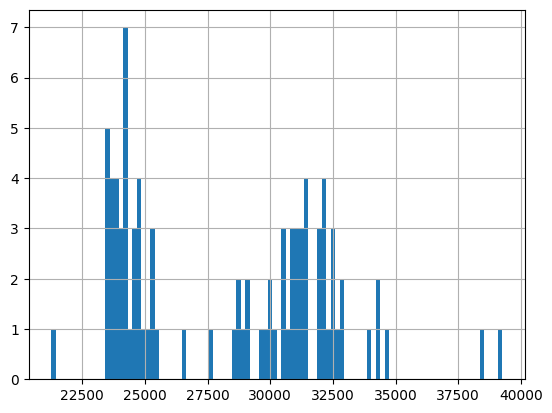

In [76]:
# pick the good length!
df_same_end_diff_len['count'].hist(bins=100)

# Beautify this figure!

In [77]:
# The bins already gives us a week difference
bins = np.arange(30000,32000,336)
df_cut = pd.cut(df_same_end_diff_len['count'], bins)
# count the number in each bin
vc = pd.value_counts(df_cut)
vc

count
(30672, 31008]    6
(31008, 31344]    4
(31344, 31680]    4
(30336, 30672]    3
(30000, 30336]    2
Name: count, dtype: int64

In [78]:
# we pick this two length as find the corrosponding length
lower_bound = vc.index.values[0].left
upper_bound = vc.index.values[1].mid

mask = (df_same_end_diff_len['count']>= lower_bound) & (df_same_end_diff_len['count'] <= upper_bound)

df_same_end_diff_len[mask]

,min,max,count
LCLid,,,
MAC004179,2012-05-21 10:30:00,2014-02-28,31084
MAC004247,2012-05-23 14:00:00,2014-02-28,30832
MAC004319,2012-05-25 09:00:00,2014-02-28,30894
MAC001510,2012-05-22 09:30:00,2014-02-28,30990
MAC001528,2012-05-22 11:00:00,2014-02-28,30923
MAC001533,2012-05-22 11:00:00,2014-02-28,30984
MAC001628,2012-05-28 08:00:00,2014-02-28,30704


In [79]:
# save the index for later use
selected_households = df_same_end_diff_len[mask].index.values
np.savez('household_names.npz', selected_households=selected_households)



In [ ]:
# go the the second note book!